In [2]:
# import the necessary libraries; numpy for math and array manipulation, matplotlib for visualization, and pandas for handling csv file data

import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 

# Data Pre Processing

In [1]:
# example of an input csv file containing sensor data
path = '../../Unsupervised_data/FER/Exp_NoExternal#1/NoExternal#1/rpi0.csv'

In [77]:
# example of reading data from the desired path

time_series_data = pd.read_csv(path)
time_series_data = time_series_data.dropna().reset_index().drop('index',axis=1)
time_series_data['datetime'] = pd.to_datetime(time_series_data['timestamp'])
time_series_data.head()

,timestamp,temp-PCB,mag_X,mag_Y,mag_Z,temp-external,light-external,humidity-external,differential_potential_CH1,differential_potential_CH2,RF_power_emission,transpiration,air_pressure,soil_moisture,soil_temperature,datetime
0,2021-04-21 14:22:30,263322.0,-143.0,-290.0,180.0,247205.0,1158619.0,515318.0,276143.0,479927.0,17284.0,4693.0,99935.0,259.0,232.0,2021-04-21 14:22:30
1,2021-04-21 14:22:40,264335.0,-143.0,-283.0,170.0,247795.0,1158619.0,514343.0,292610.0,483292.0,17326.0,4763.0,99930.0,260.0,234.0,2021-04-21 14:22:40
2,2021-04-21 14:22:50,265221.0,-146.0,-292.0,174.0,248497.0,1158619.0,513428.0,309344.0,489078.0,17229.0,4653.0,99933.0,260.0,231.0,2021-04-21 14:22:50
3,2021-04-21 14:23:00,266000.0,-153.0,-284.0,173.0,249425.0,1158619.0,512876.0,267028.0,493860.0,17164.0,4698.0,99934.0,260.0,231.0,2021-04-21 14:23:00
4,2021-04-21 14:23:10,266696.0,-151.0,-284.0,164.0,249585.0,1158619.0,510407.0,277908.0,482842.0,17268.0,4784.0,99936.0,260.0,231.0,2021-04-21 14:23:10


Text(0,0.5,'Temperature (Celzius * 10k)')

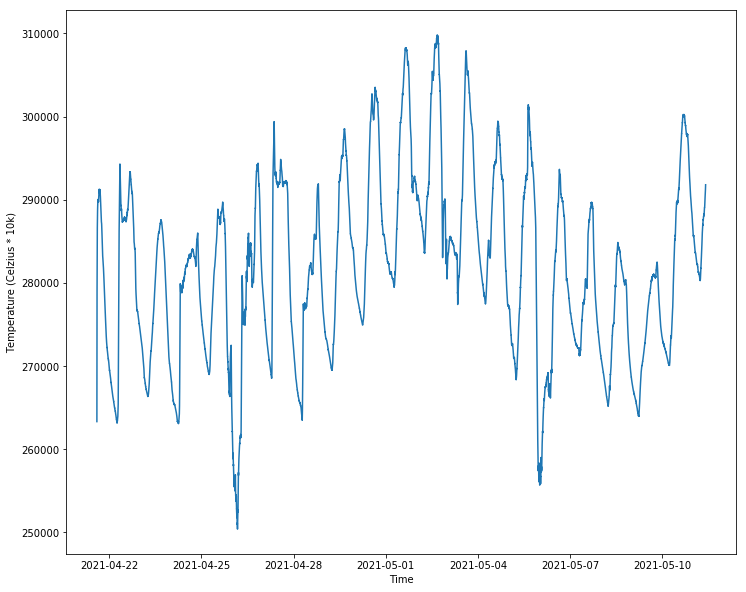

In [4]:
# visualizing the temperature data

plt.figure(figsize=(12,10))
plt.plot(time_series_data.datetime,time_series_data["temp-PCB"])
plt.xlabel('Time',fontsize=10)
plt.ylabel('Temperature (Celzius * 10k)',fontsize=10)

Text(0,0.5,'Humidity')

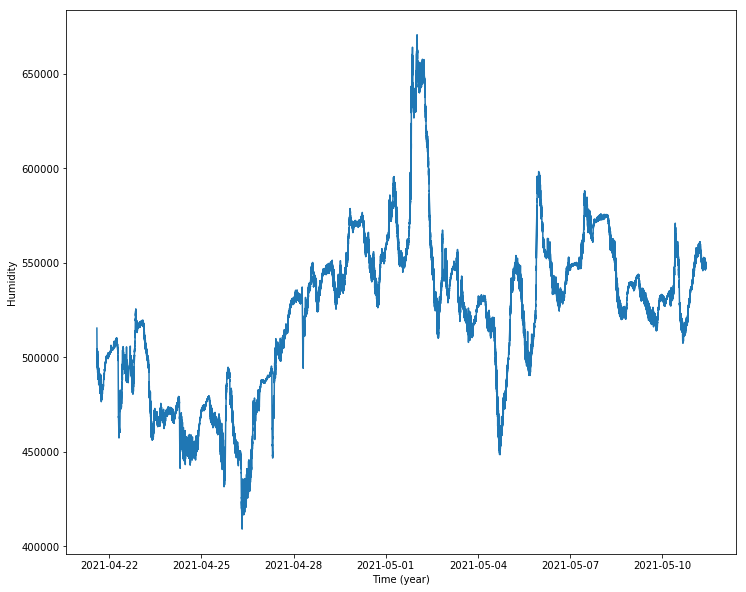

In [5]:
# visualizing the humidity data

plt.figure(figsize=(12,10))
plt.plot(time_series_data.datetime,time_series_data["humidity-external"])
plt.xlabel('Time (year)',fontsize=10)
plt.ylabel('Humidity',fontsize=10)

Text(0,0.5,'Differential potential CH2')

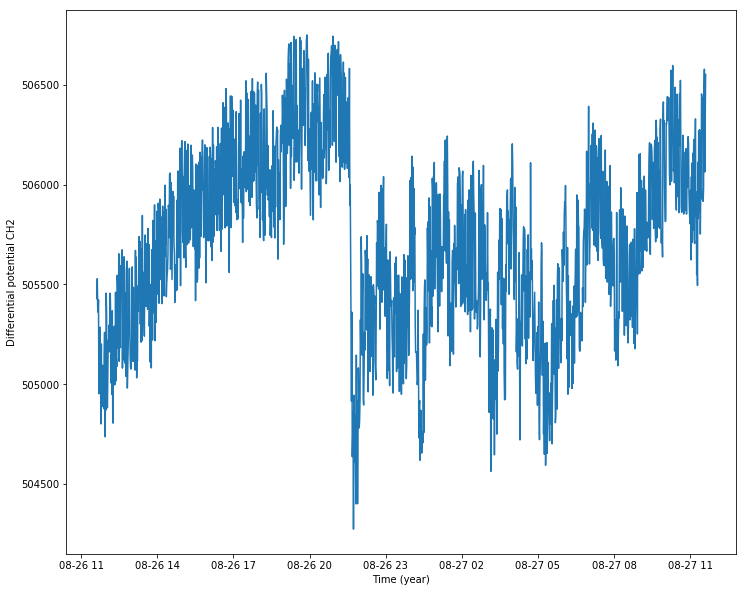

In [60]:
# visualizing the differential potential data

plt.figure(figsize=(12,10))
plt.plot(time_series_data.datetime,time_series_data["differential_potential_CH2"])
plt.xlabel('Time (year)',fontsize=10)
plt.ylabel('Differential potential CH2',fontsize=10)

[774, 726]


/tmp/ipykernel_39658/3523541662.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  df = np.array(time_series_data.groupby([time_series_data['datetime'].dt.date]))


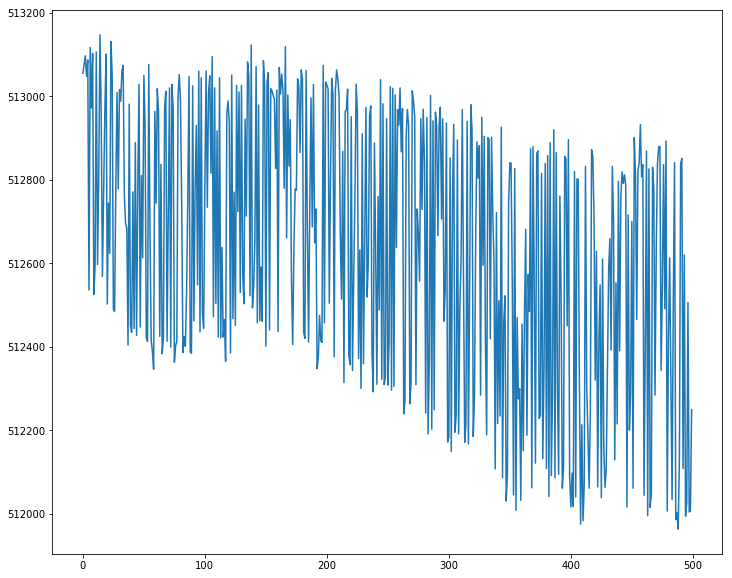

In [59]:
# example of splitting the acquired data into one day chunks

df = np.array(time_series_data.groupby([time_series_data['datetime'].dt.date]))
#plt.plot([len(i[1]) for i in df], 'ro')
print([len(i[1]) for i in df])

plt.figure(figsize=(12,10))
plt.plot(df[0,1]["differential_potential_CH1"][:500])

In [7]:
# split the data into one day chunks for classification

time_series_data.datetime[0].day

time_series_data_by_day = np.array()
for datum in time_series_data:
    current_day = datum.datetime

21

In [8]:
# try clustering the data; too slow, have to filter the data before clustering

from tslearn.clustering import TimeSeriesKMeans
model = TimeSeriesKMeans(n_clusters=3, metric="dtw", max_iter=10)

/home/user/.local/lib/python3.8/site-packages/tslearn/bases/bases.py:15: UserWarning: h5py not installed, hdf5 features will not be supported.
Install h5py to use hdf5 features: http://docs.h5py.org/
  warn(h5py_msg)


In [9]:
# example of undersampling the data by sampling it

undersample_data = time_series_data.loc[np.linspace(time_series_data.index.min(),time_series_data.index.max(),1500).astype(int)]
undersample_data = undersample_data.reset_index().drop('index',axis=1)

In [18]:
# inspecting the differential potential data

sensor_data_array = np.array(undersample_data["differential_potential_CH1"])
sensor_data_array

array([276143., 235330., 256900., ..., 193805., 198682.,  98367.])

In [19]:
undersample_data.shape

(1500, 16)

Using all FER data

In [3]:
# get list of folders with the data
paths = ['../../Unsupervised_data/FER/Exp_NoExternal#'+str(i)+'/NoExternal#'+str(i)+'/rpi1.csv' for i in range(1,9)]

In [31]:
# reading the data from the csv files, sampling, and grouping by day (first for one file, then for the rest in a for loop)

#data_CH1, data_CH2 = np.array([[]], dtype=np.float64), np.array([[]], dtype=np.float64)
# read the csv data
time_series_data = pd.read_csv(paths[0])
time_series_data = time_series_data.dropna().reset_index().drop('index',axis=1)
time_series_data['datetime'] = pd.to_datetime(time_series_data['timestamp'])

# undersample data if needed
time_series_data = time_series_data.loc[np.linspace(time_series_data.index.min(),time_series_data.index.max(),1500).astype(int)]
time_series_data = time_series_data.reset_index().drop('index',axis=1)

# cut the data into one day bunches
df = np.array(time_series_data.groupby([time_series_data['datetime'].dt.date]))

one_day_data_CH1, one_day_data_CH2 = np.array([np.array(i[1]["differential_potential_CH1"]) for i in df]), np.array([np.array(i[1]["differential_potential_CH2"]) for i in df])
one_day_all_CH1, one_day_all_CH2 = np.array([i[1] for i in df]), np.array([i[1] for i in df])

# concatenate the data
data_CH1 = np.array(one_day_data_CH1)
data_CH2 = np.array(one_day_data_CH2)


i = 0
for path in paths[1:]:
    # read the csv data
    time_series_data = pd.read_csv(path)
    time_series_data = time_series_data.dropna().reset_index().drop('index',axis=1)
    time_series_data['datetime'] = pd.to_datetime(time_series_data['timestamp'])

    # undersample data if needed
    time_series_data = time_series_data.loc[np.linspace(time_series_data.index.min(),time_series_data.index.max(),1500).astype(int)]
    time_series_data = time_series_data.reset_index().drop('index',axis=1)

    # cut the data into one day bunches
    df = np.array(time_series_data.groupby([time_series_data['datetime'].dt.date]))
    
    one_day_data_CH1, one_day_data_CH2 = np.array([np.array(i[1]["differential_potential_CH1"]) for i in df]), np.array([np.array(i[1]["differential_potential_CH2"]) for i in df])
    one_day_all_CH1 = np.concatenate((one_day_all_CH1, np.array([i[1] for i in df])), axis=0)
    one_day_all_CH2 = np.concatenate((one_day_all_CH2, np.array([i[1] for i in df])), axis=0)
    # concatenate the data
    data_CH1 = np.concatenate((data_CH1, one_day_data_CH1), axis=0)
    data_CH2 = np.concatenate((data_CH2, one_day_data_CH2), axis=0)
    print("No {}: CH1 shape {}, CH2 shape {}".format(i, np.array(one_day_data_CH1).shape, np.array(one_day_data_CH2).shape))
    print("One day {}, {}".format(one_day_all_CH1.shape, one_day_all_CH2.shape))
    i += 1


/tmp/ipykernel_39658/2855744557.py:12: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  df = np.array(time_series_data.groupby([time_series_data['datetime'].dt.date]))
/tmp/ipykernel_39658/2855744557.py:14: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  one_day_data_CH1, one_day_data_CH2 = np.array([np.array(i[1]["differential_potential_CH1"]) for i in df]), np.array([np.array(i[1]["differential_potential_CH2"]) for i in df])
/tmp/ipykernel_39658/2855744557.py:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

No 0: CH1 shape (7,), CH2 shape (7,)
One day (28,), (28,)
No 1: CH1 shape (8,), CH2 shape (8,)
One day (36,), (36,)


/tmp/ipykernel_39658/2855744557.py:33: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  df = np.array(time_series_data.groupby([time_series_data['datetime'].dt.date]))
/tmp/ipykernel_39658/2855744557.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  one_day_data_CH1, one_day_data_CH2 = np.array([np.array(i[1]["differential_potential_CH1"]) for i in df]), np.array([np.array(i[1]["differential_potential_CH2"]) for i in df])
/tmp/ipykernel_39658/2855744557.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

No 2: CH1 shape (4,), CH2 shape (4,)
One day (40,), (40,)
No 3: CH1 shape (8,), CH2 shape (8,)
One day (48,), (48,)


/tmp/ipykernel_39658/2855744557.py:33: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  df = np.array(time_series_data.groupby([time_series_data['datetime'].dt.date]))
/tmp/ipykernel_39658/2855744557.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  one_day_data_CH1, one_day_data_CH2 = np.array([np.array(i[1]["differential_potential_CH1"]) for i in df]), np.array([np.array(i[1]["differential_potential_CH2"]) for i in df])
/tmp/ipykernel_39658/2855744557.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

No 4: CH1 shape (7,), CH2 shape (7,)
One day (55,), (55,)
No 5: CH1 shape (21,), CH2 shape (21,)
One day (76,), (76,)
No 6: CH1 shape (2,), CH2 shape (2,)
One day (78,), (78,)


/tmp/ipykernel_39658/2855744557.py:33: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  df = np.array(time_series_data.groupby([time_series_data['datetime'].dt.date]))
/tmp/ipykernel_39658/2855744557.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  one_day_data_CH1, one_day_data_CH2 = np.array([np.array(i[1]["differential_potential_CH1"]) for i in df]), np.array([np.array(i[1]["differential_potential_CH2"]) for i in df])
/tmp/ipykernel_39658/2855744557.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

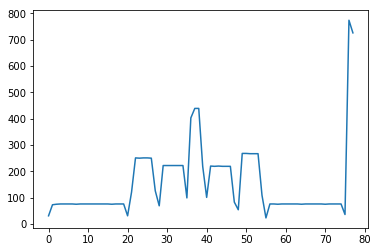

In [5]:
# visualizing the one day bunches of the CH1 channel
plt.plot([i.shape for i in data_CH1])

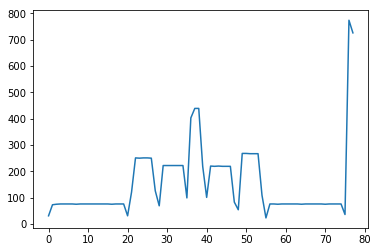

In [7]:
# visualizing the one day bunches of the CH2 channel
plt.plot([i.shape for i in data_CH2])

In [34]:
one_day_all_CH1.shape

(78,)

In [35]:
data_CH1.shape

(78,)

In [8]:
# attempt at clustering the CH1 data; this time successful
from tslearn.clustering import TimeSeriesKMeans

model = TimeSeriesKMeans(n_clusters=10, metric="dtw", max_iter=10)
model.fit(data_CH1)

/home/user/.local/lib/python3.8/site-packages/tslearn/bases/bases.py:15: UserWarning: h5py not installed, hdf5 features will not be supported.
Install h5py to use hdf5 features: http://docs.h5py.org/
  warn(h5py_msg)


In [10]:
# indexing the data so that it can be properly visualized

data_temp = []
data_CH1_indices, data_CH2_indices = [], []
index = 0
for i in data_CH1:
    if len(i)>200:
        sampled_i = []
        [sampled_i.append(i[j]) for j in np.linspace(0,len(i)-1,200).astype(int)]
        data_temp.append(np.array(sampled_i))
        data_CH1_indices.append(index)
    index+=1
print(len(data_temp))
index = 0
for i in data_CH2:
    if len(i)>200:
        sampled_i = []
        [sampled_i.append(i[j]) for j in np.linspace(0,len(i)-1,200).astype(int)]
        data_temp.append(np.array(sampled_i))
        data_CH2_indices.append(index)
    index+=1

data_temp = np.array(data_temp)
print(data_temp.shape)
print("CH1 indices: ", data_CH1_indices)
print("CH2 indices: ", data_CH2_indices)

28
(56, 200)
CH1 indices:  [22, 23, 24, 25, 26, 29, 30, 31, 32, 33, 34, 36, 37, 38, 39, 41, 42, 43, 44, 45, 46, 49, 50, 51, 52, 53, 76, 77]
CH2 indices:  [22, 23, 24, 25, 26, 29, 30, 31, 32, 33, 34, 36, 37, 38, 39, 41, 42, 43, 44, 45, 46, 49, 50, 51, 52, 53, 76, 77]


In [11]:
# clustering the labeled data (entire dataset)
from tslearn.clustering import TimeSeriesKMeans

model = TimeSeriesKMeans(n_clusters=10, metric="dtw", max_iter=10)
model.fit(data_temp)

/home/user/.local/lib/python3.8/site-packages/tslearn/bases/bases.py:15: UserWarning: h5py not installed, hdf5 features will not be supported.
Install h5py to use hdf5 features: http://docs.h5py.org/
  warn(h5py_msg)


TimeSeriesKMeans(max_iter=10, metric='dtw', n_clusters=10)

In [23]:
# trying out the predicted model
model.predict([data_temp[10]])[0]

/home/user/.local/lib/python3.8/site-packages/tslearn/utils/utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 1 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '


1

In [36]:
# acquiring examples of predictions for all 10 clusters

predictions = {0:[], 1:[], 2:[], 3:[], 4:[], 5:[], 6:[], 7:[], 8:[], 9:[]}

j = 0

for i in data_temp:
    prediction = model.predict([i])[0]
    current_list = predictions.get(prediction)
    if j<78:
        current_list.append((i,one_day_all_CH1[j]))
    else:
        current_list.append((i,one_day_all_CH2[j-78]))
    predictions.update({prediction:current_list})
    j += 1

/home/user/.local/lib/python3.8/site-packages/tslearn/utils/utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 1 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '
/home/user/.local/lib/python3.8/site-packages/tslearn/utils/utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 1 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '
/home/user/.local/lib/python3.8/site-packages/tslearn/utils/utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 1 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '
/home/user/.local/lib/python3.8/site-packages/tslearn/utils/utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 1 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '
/home/user/.local/lib/python3.8/site-packages/tslearn/utils/utils.py:88: UserWarning: 2-Dimensional data

In [37]:
# number of units per cluster
[len(i[1]) for i in predictions.items()]

[2, 5, 18, 3, 1, 16, 4, 5, 1, 1]

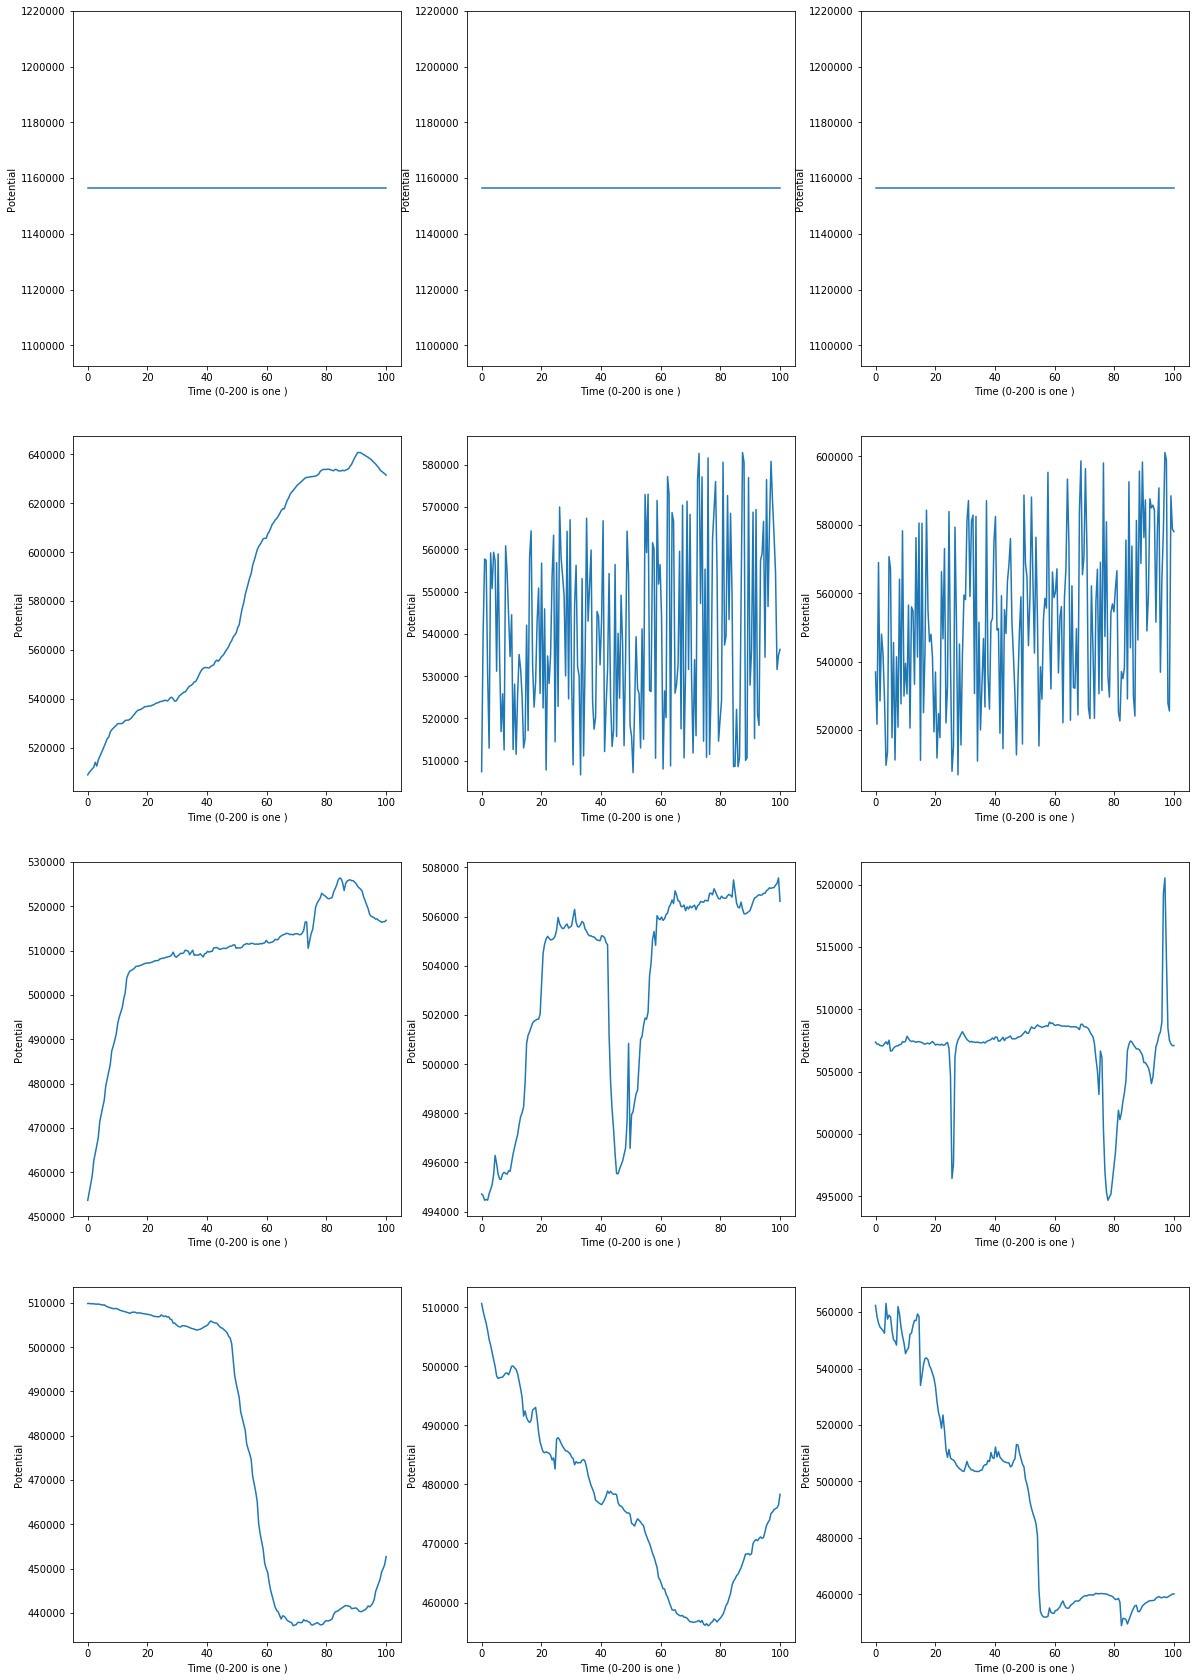

In [27]:
# visualization of the clustering results; for cluster inspection
plt.figure(figsize=(20,30))
count=1
for i in [1,6,5,7]:
    for j in range(3):
        plt.subplot(4,3,count)
        plt.plot(np.linspace(0,100,num=200), predictions.get(i)[j])
        plt.ylabel('Potential')
        plt.xlabel('Time (0-100 is one day)')
        count+=1


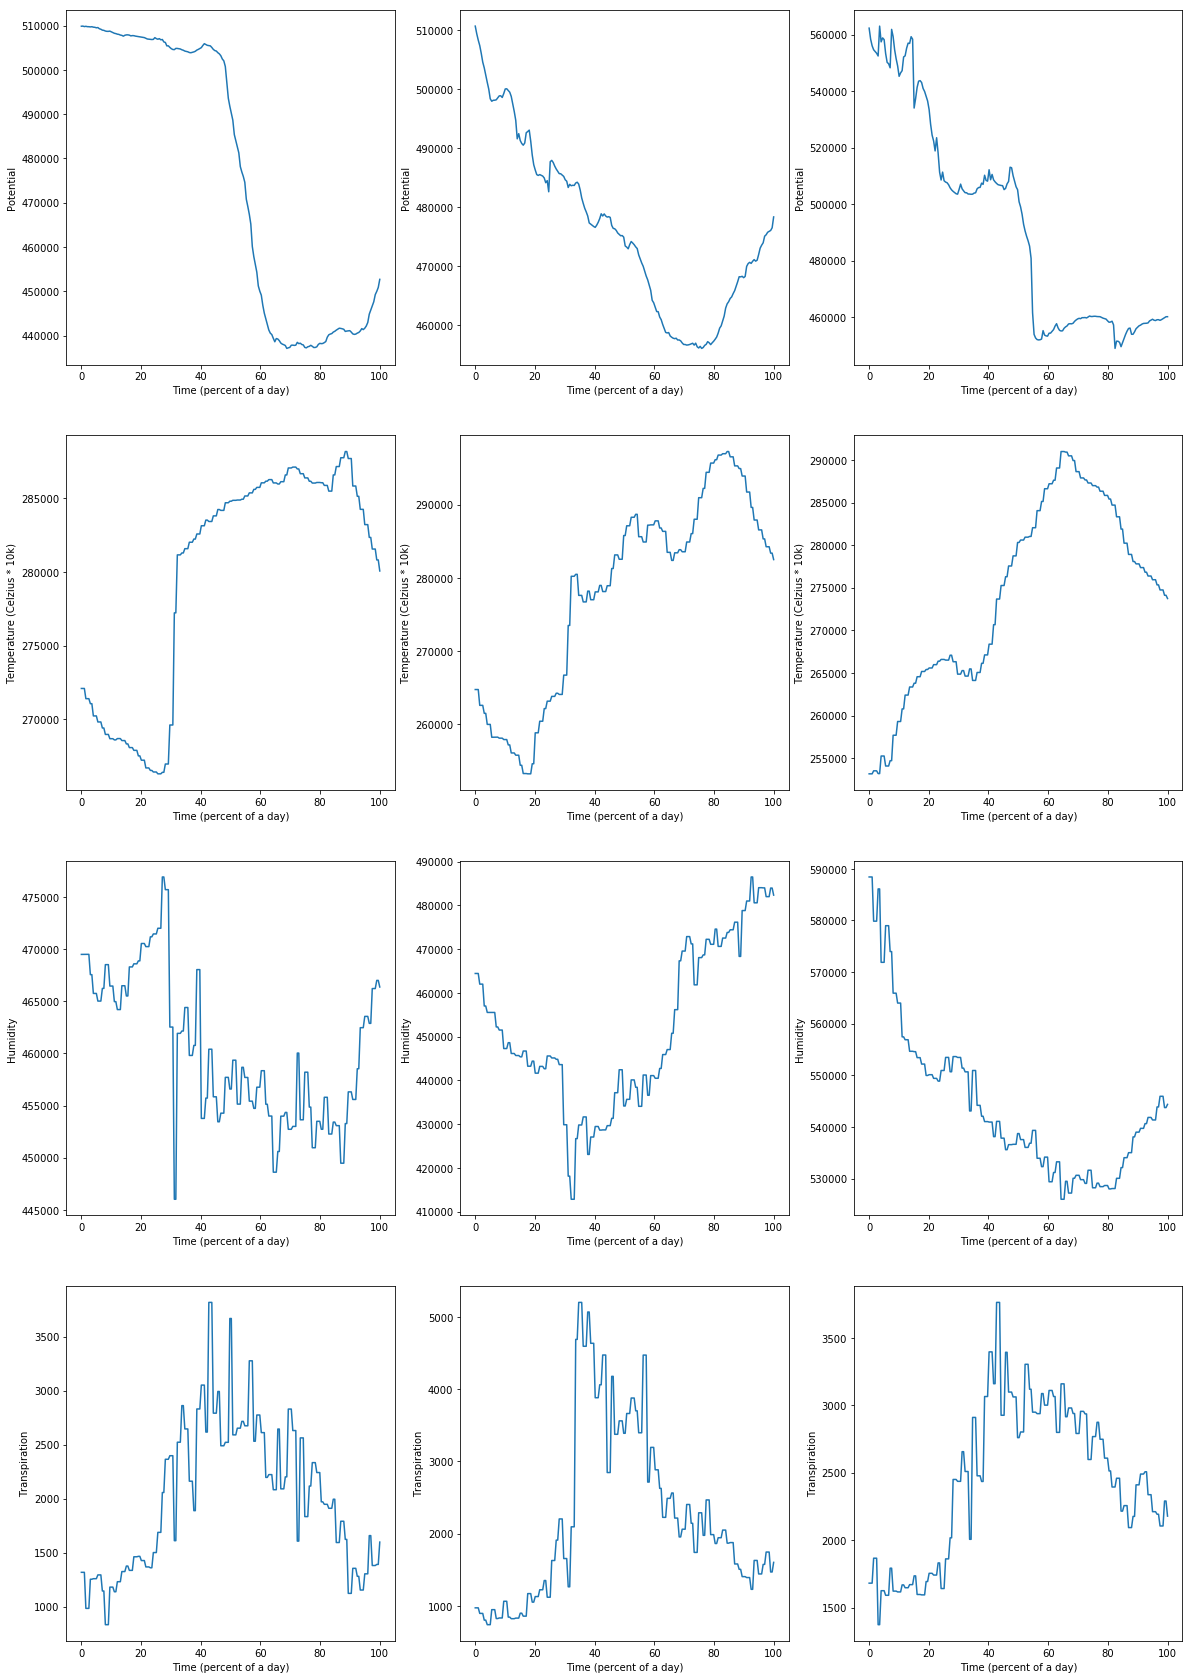

In [58]:
# more examples; better labeling

plt.figure(figsize=(20,30))
count=1
for i in range(3):
    plt.subplot(4,3,count)
    plt.plot(np.linspace(0,100,num=200), predictions.get(7)[i][0])
    plt.ylabel('Potential')
    plt.xlabel('Time (percent of a day)')
    count+=1

for i in [("temp-PCB", 'Temperature (Celzius * 10k)'), ("humidity-external", 'Humidity'),("transpiration", 'Transpiration')]:
    for j in range(3):
        plt.subplot(4,3,count)
        aux = np.array(predictions.get(7)[j][1][i[0]])
        aux_sampled = []
        [aux_sampled.append(aux[j]) for j in np.linspace(0,len(aux)-1,200).astype(int)]
        plt.plot(np.linspace(0,100,num=200), aux_sampled)
        plt.ylabel(i[1])
        plt.xlabel('Time (percent of a day)')
        count+=1